# Type 2 Diabetes Early Detection AI Agent

## 1. Introduction
This project aims to build an AI-driven early detection system for Type 2 Diabetes using NHANES datasets (2013–2018) and supporting external data sources.  
The goal is to create a robust, interpretable, and deployable model that can help identify individuals at high risk of developing Type 2 Diabetes at an early stage.


## Step 2: Business Understanding

### 2.1 Introduction & Context
Type 2 Diabetes is a growing public health crisis across Africa and particularly in Kenya. According to the **International Diabetes Federation (IDF)**, more than **24 million adults in Africa** currently live with diabetes, a figure projected to rise to **55 million by 2045** as lifestyles change and urbanization accelerates :contentReference[oaicite:3]{index=3}.  
In Kenya, adult prevalence is estimated at **~ 3.1%**, which translates to about **813,300 adults aged 20–79** living with diabetes :contentReference[oaicite:4]{index=4}.

---

### 2.2 The Situation in Kenya
Despite these numbers, awareness and testing remain critically low:  

- Around **40% of Kenyans with diabetes are unaware** of their condition.  
- More than **88% of Kenyans have never had their blood sugar tested** (STEPS survey, 2015).  
- Officially, about **800,000 people have been diagnosed** with diabetes in Kenya.  

These facts imply that a large population is at risk of undiagnosed or late-diagnosed diabetes, which leads to complications like cardiovascular disease, kidney failure, blindness, and adds large economic burdens.

---

### 2.3 Problem Statement
How can we build a predictive AI system, tailored to the Kenyan and East African population, that **identifies individuals at high risk for Type 2 Diabetes early**—before complications arise—so that intervention is timely, cost-effective, and scalable?

---

### 2.4 Objectives
1. **Early Risk Identification**  
   Develop a predictive model with strong recall/sensitivity to capture undiagnosed cases, helping reduce the large fraction of people who are unaware of their condition.  

2. **Public Health & Clinical Impact**  
   - Support Kenya’s healthcare system in early detection and prevention.  
   - Provide region-specific risk factor insights (e.g., obesity, hypertension, diet, physical inactivity).  

3. **AI Agent Deployment**  
   Deliver not just a model, but a deployable tool that can be integrated into Kenyan/East African health initiatives for self-assessment and screening.

---

### 2.5 Success Metrics
- **Model performance:** High recall (≥ 80%), balanced F1, strong ROC-AUC.  
- **Social impact:** Decrease undiagnosed cases (currently large in Kenya) through earlier screening and awareness.  
- **Operational:** Tool must be usable in low-resource environments, cost-effective, scalable.

---

### 2.6 Suggested Visuals for this Step
Embed visuals from authoritative sources or from your generated plots:

#### 1. Diabetes Prevalence in Africa vs Kenya  
Link to a WHO/IDF Africa fact sheet containing this chart:  
[Diabetes in Africa Fact Sheet (WHO)](https://files.aho.afro.who.int/afahobckpcontainer/production/files/iAHO_Diabetes_Regional_Factsheet.pdf) :contentReference[oaicite:5]{index=5}

#### 2. IDF Kenya Statistics Page  
Kenya prevalence 3.1%, cases ~813,300:  
[IDF Kenya – Diabetes Network](https://idf.org/our-network/regions-and-members/africa/members/kenya/) :contentReference[oaicite:6]{index=6}

#### 3. Additional Global / Africa Projections  
Use data from WHO/AFRO “A Silent Killer” PDF or the IDF Atlas :contentReference[oaicite:7]{index=7}

---

### References  
[1] WHO / Afro. *Diabetes, a silent killer in Africa – Fact Sheet* (2023) :contentReference[oaicite:8]{index=8}  
[2] IDF. *Kenya | Diabetes Network* :contentReference[oaicite:9]{index=9}  
[3] WHO Kenya. *Diabetes is a family affair in Kenya* (2019) :contentReference[oaicite:10]{index=10}  


# 3. Data Understanding

## 3.1 Overview of Data Sources

**NHANES (National Health and Nutrition Examination Survey)**  
- Years used: **2013–2014, 2015–2016, 2017–2018**  
- Components selected:  
  - **Demographics:** age, sex, ethnicity, education, income  
  - **Examination:** BMI, blood pressure, waist circumference  
  - **Laboratory:** fasting plasma glucose, HbA1c, cholesterol  
  - **Questionnaire:** self-reported health, medical history, physical activity, diet, smoking, alcohol use  

**External Supporting Data**  
- Kenya/East Africa diabetes-related stats (to contextualize model relevance).  
- Potential socioeconomic datasets (e.g., World Bank indicators, WHO health stats).  

---

## 3.2 Dataset Characteristics

**NHANES Structure**  
- Large, nationally representative dataset from the U.S.  
- Each survey cycle is a **2-year period**.  
- Data files are split by subject area (demographic, lab, exam, questionnaire).  
- Participants linked across components using the unique respondent ID (`SEQN`).  

**Sample Sizes (approx.):**  
- 2013–2014: ~9,800 participants  
- 2015–2016: ~9,971 participants  
- 2017–2018: ~9,254 participants  
- **Total pooled dataset:** ~29,000 participants  

---

## 3.3 Key Variables of Interest

- **Demographics:** Age, Gender, Race/Ethnicity, Education, Income-to-poverty ratio  
- **Examination:** BMI, Waist Circumference, Blood Pressure  
- **Laboratory:** HbA1c (%), Fasting Plasma Glucose (mg/dL), Cholesterol  
- **Questionnaire:** Family history of diabetes, Smoking, Alcohol, Physical activity, Diet  

---

## 3.4 Target Variable Definition

**Outcome variable (binary): Diabetes status**  

Defined as **Diabetic (1)** if:  
- HbA1c ≥ 6.5%, **OR**  
- Fasting Plasma Glucose ≥ 126 mg/dL, **OR**  
- Self-reported physician diagnosis  

Otherwise, **Non-Diabetic (0)**.  

---

## 3.5 Data Quality & Challenges

- **Missing Values:** Some lab tests not done for all participants (fasting samples only subset).  
- **Survey Bias:** NHANES is U.S.-based — adaptation needed when contextualizing to Kenya/Africa.  
- **Integration:** Must merge multiple files (demographics, exam, labs, questionnaire) carefully.  
- **Class Imbalance:** Expect fewer diabetes cases (~10–12%) than non-diabetes in dataset.  

---

## 3.6 Suggested Visuals for Data Understanding

- **Table:** Sample sizes per survey year.  
- **Histogram:** Age distribution of participants.  
- **Pie chart:** Gender distribution.  
- **Bar chart:** Diabetes prevalence across survey cycles.  


In [1]:
# 3. Data Understanding

# 3.1 Import Libraries & Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default visualization style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Show all columns when displaying dataframes
pd.set_option("display.max_columns", None)


In [2]:
# 3.2 Load One NHANES Dataset (Demographics as an example)
# NHANES files are in XPT (SAS transport) format
# We'll use the DEMO_J.xpt (2017–2018) file first

demo_path = "../Data/DEMO_J.xpt"

try:
    demo_df = pd.read_sas(demo_path)
    print("✅ DEMO_J.xpt loaded successfully!")
    display(demo_df.head())
except Exception as e:
    print("❌ Error loading DEMO_J.xpt:", e)


✅ DEMO_J.xpt loaded successfully!


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,5.0,3.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4.0,4.0,2.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,2.0,3.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.000000e+00,2.0,4.0,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,2.0,NaN,1.0,1.0,NaN,15.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,1.0,2.0,2.0,1.0,5.0,5.0,5.397605e-79,5.397605e-79,1.000000e+00,1.0,4.0,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,NaN,NaN,1.0,1.0,NaN,6.0,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,7.0,7.0,5.397605e-79,3.000000e+00,5.397605e-79,1.0,3.0,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88


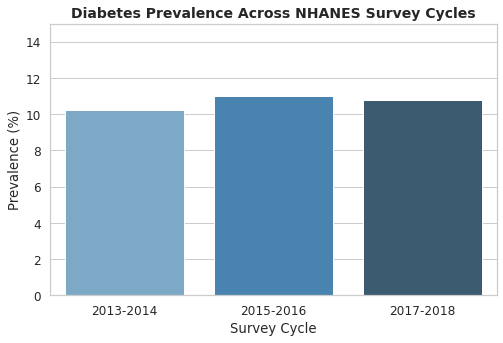

In [3]:
# 3.3 Example: Bar Chart of Diabetes Prevalence Across Survey Cycles
# (Placeholder numbers – will be updated once diabetes status is defined)

cycles = ["2013-2014", "2015-2016", "2017-2018"]
prevalence = [10.2, 11.0, 10.8]  # % prevalence (example values)

plt.figure(figsize=(8,5))
sns.barplot(x=cycles, y=prevalence, palette="Blues_d")
plt.title("Diabetes Prevalence Across NHANES Survey Cycles", fontsize=14, weight="bold")
plt.ylabel("Prevalence (%)")
plt.xlabel("Survey Cycle")
plt.ylim(0, 15)
plt.show()


## Load Additional NHANES & External Datasets

In [4]:
# Define paths for key NHANES datasets
exam_files = ["../Data/BPXO_J.xpt", "../Data/BPQ_J.xpt"]        # Examination files
lab_files = ["../Data/GLU_J.xpt", "../Data/TCHOL_J.xpt", "../Data/TRIGLY_J.xpt"]  # Lab files
questionnaire_files = ["../Data/PAQY_J.xpt", "../Data/PFQ_J.xpt", "../Data/SMQFAM_J.xpt"]  # Example

# Load NHANES exam datasets
exam_dfs = []
for f in exam_files:
    try:
        df = pd.read_sas(f)
        exam_dfs.append(df)
        print(f"✅ {f} loaded successfully!")
    except Exception as e:
        print(f"❌ Error loading {f}: {e}")

# Load NHANES lab datasets
lab_dfs = []
for f in lab_files:
    try:
        df = pd.read_sas(f)
        lab_dfs.append(df)
        print(f"✅ {f} loaded successfully!")
    except Exception as e:
        print(f"❌ Error loading {f}: {e}")

# Load NHANES questionnaire datasets
questionnaire_dfs = []
for f in questionnaire_files:
    try:
        df = pd.read_sas(f)
        questionnaire_dfs.append(df)
        print(f"✅ {f} loaded successfully!")
    except Exception as e:
        print(f"❌ Error loading {f}: {e}")

# Load external CSV datasets
external_csvs = ["../Data/diabetes_012_health_indicators_BRFSS2015.csv",
                 "../Data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv",
                 "../Data/diabetes_data_upload.csv",
                 "../Data/Diabetes_Final_Data_V2.csv",
                 "../Data/diabetes_prediction_dataset.csv"]

external_dfs = []
for f in external_csvs:
    try:
        df = pd.read_csv(f)
        external_dfs.append(df)
        print(f"✅ {f} loaded successfully!")
    except Exception as e:
        print(f"❌ Error loading {f}: {e}")


✅ ../Data/BPXO_J.xpt loaded successfully!
✅ ../Data/BPQ_J.xpt loaded successfully!
✅ ../Data/GLU_J.xpt loaded successfully!
✅ ../Data/TCHOL_J.xpt loaded successfully!
✅ ../Data/TRIGLY_J.xpt loaded successfully!
✅ ../Data/PAQY_J.xpt loaded successfully!
✅ ../Data/PFQ_J.xpt loaded successfully!
✅ ../Data/SMQFAM_J.xpt loaded successfully!
✅ ../Data/diabetes_012_health_indicators_BRFSS2015.csv loaded successfully!
✅ ../Data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv loaded successfully!
✅ ../Data/diabetes_data_upload.csv loaded successfully!
✅ ../Data/Diabetes_Final_Data_V2.csv loaded successfully!
✅ ../Data/diabetes_prediction_dataset.csv loaded successfully!


# 4. Data Cleaning & Preprocessing

## 4.1 Overview
Before modeling, the NHANES and external datasets must be merged, cleaned, and standardized. This step ensures consistency, removes missing or incorrect values, and prepares the data for feature engineering and machine learning.

---

## 4.2 Goals
- Merge multiple NHANES components (Demographics, Examination, Laboratory, Questionnaire) with external datasets.  
- Handle missing values appropriately (imputation or removal).  
- Standardize column names and formats.  
- Encode categorical variables (e.g., gender, ethnicity, family history).  
- Detect and remove duplicates or inconsistent records.  
- Scale numerical variables if required by downstream models.

---

## 4.3 Planned Steps
1. **Merge datasets** using the unique respondent ID (`SEQN`).  
2. **Inspect missing values** across all features and decide imputation strategies.  
3. **Rename columns** to human-readable names.  
4. **Encode categorical variables** using one-hot encoding or label encoding.  
5. **Check for outliers** in key continuous variables (BMI, blood pressure, glucose, cholesterol).  
6. **Normalize/standardize numerical features** if needed for modeling.  
7. **Save cleaned dataset** for exploratory data analysis and feature engineering.

---

## 4.4 Suggested Visualizations
- Heatmap of missing values per feature.  
- Boxplots for numerical variables to detect outliers.  
- Count plots for categorical variables to inspect distribution.  
- Correlation matrix to understand feature relationships.


In [ ]:
import os

# 4.5 Preview Top 5 Rows of All NHANES & External Datasets

data_dir = "../Data"

# Identify all XPT and CSV files
all_files = [f for f in os.listdir(data_dir) if f.endswith((".xpt", ".csv"))]

# Separate NHANES XPT files and external CSVs
nhanes_files = [f for f in all_files if f.endswith(".xpt")]
external_files = [f for f in all_files if f.endswith(".csv")]

# Dictionaries to hold loaded dataframes
nhanes_dfs = {}
external_dfs = {}

# Function to load and preview datasets
def load_and_preview(file_name):
    file_path = os.path.join(data_dir, file_name)
    try:
        if file_name.endswith(".xpt"):
            df = pd.read_sas(file_path)
        else:
            df = pd.read_csv(file_path)
        print(f"✅ {file_name} loaded successfully!")
        display(df.head())
        return df
    except Exception as e:
        print(f"❌ Error loading {file_name}:", e)
        return None

# Load NHANES datasets
print("### NHANES 2017–2018 Datasets")
for file_name in nhanes_files:
    nhanes_dfs[file_name] = load_and_preview(file_name)

# Load external datasets
print("\n### External Supporting Datasets")
for file_name in external_files:
    external_dfs[file_name] = load_and_preview(file_name)


### NHANES 2017–2018 Datasets
✅ RXQ_RX_J.xpt loaded successfully!


,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,93703.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN
1,93704.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN
2,93705.0,1.0,b'ENALAPRIL; HYDROCHLOROTHIAZIDE',b'd03740',1.0,5475.0,b'I10',b'',b'',b'Essential (primary) hypertension',b'',b'',3.0
3,93705.0,1.0,b'MELOXICAM',b'd04532',1.0,61.0,b'M06.9',b'',b'',"b'Rheumatoid arthritis, unspecified'",b'',b'',3.0
4,93705.0,1.0,b'OMEPRAZOLE',b'd00325',1.0,3650.0,b'R12',b'',b'',b'Heartburn',b'',b'',3.0


✅ GLU_J.xpt loaded successfully!


,SEQN,WTSAF2YR,LBXGLU,LBDGLUSI
0,93708.0,2.565368e+04,122.0,6.77
1,93711.0,2.922605e+04,107.0,5.94
2,93717.0,1.371510e+05,91.0,5.05
3,93718.0,5.888331e+04,89.0,4.94
4,93719.0,5.397605e-79,86.0,4.77


✅ DLQ_J.xpt loaded successfully!


,SEQN,DLQ010,DLQ020,DLQ040,DLQ050,DLQ060,DLQ080,DLQ100,DLQ110,DLQ130,DLQ140,DLQ150,DLQ170
0,93703.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,4.0,2.0,1.0
3,93706.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,NaN,5.0,2.0,NaN
4,93707.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


✅ CBQ_I.xpt loaded successfully!


,SEQN,CBD071,CBD091,CBD111,CBD121,CBD131
0,83732.0,300.0,3.000000e+01,5.397605e-79,1.250000e+02,5.397605e-79
1,83733.0,200.0,5.397605e-79,5.000000e+01,4.000000e+01,5.397605e-79
2,83734.0,400.0,8.000000e+01,5.397605e-79,5.397605e-79,5.397605e-79
3,83735.0,300.0,1.000000e+02,2.500000e+02,5.000000e+01,5.397605e-79
4,83736.0,300.0,5.397605e-79,5.397605e-79,2.000000e+02,5.397605e-79


✅ HOQ_J.xpt loaded successfully!


,SEQN,HOD050,HOQ065
0,93703.0,6.0,1.0
1,93704.0,10.0,1.0
2,93705.0,3.0,2.0
3,93706.0,NaN,NaN
4,93707.0,9.0,1.0


✅ DSPI.xpt loaded successfully!


,DSDPID,DSDPRDT,DSDSUPP,DSDSRCE,DSDTYPE,DSDSERVQ,DSDSERVU,DSDPREID,DSDORGID,DSDSGPF,DSDSEQF,DSDLINRF,DSDCNTV,DSDCNTM,DSDCNTA,DSDCNTB,DSDCNTO,DSDSUPID
0,1.0,1.0,b'MYADEC HIGH POTENCY MULTIVITAMIN-MULTIMINERA...,9.0,4.0,1.0,18.0,NaN,1.0,1.0,1.0,1.0,1.300000e+01,1.600000e+01,5.397605e-79,5.397605e-79,1.000000e+00,b'1000032500'
1,2.0,1.0,b'FERGON FERROUS GLUCONATE HIGH POTENCY IRON',9.0,4.0,1.0,18.0,NaN,2.0,1.0,1.0,1.0,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,b'1000030700'
2,3.0,1.0,b'GNC ULTRA MEGA MULTIPLE VITAMINS AND MINERAL...,9.0,4.0,1.0,18.0,NaN,3.0,1.0,1.0,1.0,1.300000e+01,1.000000e+01,5.397605e-79,1.000000e+00,7.000000e+00,b'1000032000'
3,6.0,1.0,"b""BUGS BUNNY COMPLETE CHILDREN'S CHEWABLE VITA...",9.0,1.0,1.0,18.0,NaN,6.0,1.0,1.0,1.0,1.200000e+01,7.000000e+00,5.397605e-79,5.397605e-79,1.000000e+00,b'1000030800'
4,7.0,1.0,"b""BUGS BUNNY WITH EXTRA C CHILDREN'S CHEWABLE ...",9.0,1.0,1.0,18.0,NaN,7.0,1.0,1.0,1.0,1.000000e+01,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,b'1000031000'


✅ DUQ_I.xpt loaded successfully!


,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ215Q,DUQ215U,DUQ217,DUQ219,DUQ220Q,DUQ220U,DUQ230,DUQ240,DUQ250,DUQ260,DUQ270Q,DUQ270U,DUQ272,DUQ280,DUQ290,DUQ300,DUQ310Q,DUQ310U,DUQ320,DUQ330,DUQ340,DUQ350Q,DUQ350U,DUQ352,DUQ360,DUQ370,DUQ380A,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430
0,83732.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83733.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83735.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83736.0,1.0,25.0,1.0,25.0,5.397605e-79,1.0,5.0,4.0,1.0,1.0,30.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,83741.0,1.0,15.0,1.0,16.0,1.000000e+00,4.0,4.0,2.0,1.0,1.0,25.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


✅ SMQRTU_J.xpt loaded successfully!


,SEQN,SMQ681,SMQ690A,SMQ710,SMQ720,SMQ725,SMQ690B,SMQ740,SMQ690C,SMQ770,SMQ690G,SMQ845,SMQ690H,SMQ849,SMQ851,SMQ690D,SMQ800,SMQ690E,SMQ817,SMQ690K,SMQ857O,SMQ863,SMQ690F,SMQ830,SMQ840,SMDANY,SMAQUEX
0,93705.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0
1,93706.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0
2,93707.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
3,93708.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0
4,93709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


✅ SMQSHS_J.xpt loaded successfully!


,SEQN,SMQ856,SMQ858,SMQ860,SMQ862,SMQ866,SMQ868,SMQ870,SMQ872,SMQ874,SMQ876,SMQ878,SMQ880,SMQ940,SMAQUEX
0,93703.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,1.0,2.0,2.0,3.0
1,93704.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0
2,93705.0,1.0,2.0,1.0,2.0,2.0,NaN,1.0,2.0,2.0,NaN,2.0,NaN,2.0,2.0
3,93706.0,2.0,NaN,2.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,1.0,2.0
4,93707.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,1.0,2.0,2.0,1.0


✅ ALQ_I.xpt loaded successfully!


,SEQN,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,ALQ160
0,83732.0,1.0,NaN,1.000000e+00,2.0,1.0,5.397605e-79,NaN,2.0,NaN
1,83733.0,1.0,NaN,7.000000e+00,1.0,6.0,7.000000e+00,1.0,1.0,5.397605e-79
2,83734.0,1.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,1.0,NaN
3,83735.0,2.0,1.0,3.000000e+00,3.0,1.0,5.397605e-79,NaN,2.0,NaN
4,83736.0,2.0,1.0,1.000000e+00,3.0,1.0,5.397605e-79,NaN,2.0,NaN


✅ DIQ_J.xpt loaded successfully!


,SEQN,DIQ010,DID040,DIQ160,DIQ170,DIQ172,DIQ175A,DIQ175B,DIQ175C,DIQ175D,DIQ175E,DIQ175F,DIQ175G,DIQ175H,DIQ175I,DIQ175J,DIQ175K,DIQ175L,DIQ175M,DIQ175N,DIQ175O,DIQ175P,DIQ175Q,DIQ175R,DIQ175S,DIQ175T,DIQ175U,DIQ175V,DIQ175W,DIQ175X,DIQ180,DIQ050,DID060,DIQ060U,DIQ070,DIQ230,DIQ240,DID250,DID260,DIQ260U,DIQ275,DIQ280,DIQ291,DIQ300S,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080
0,93703.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93706.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93707.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


✅ DR2TOT_J.xpt loaded successfully!


,SEQN,WTDRD1,WTDR2D,DR2DRSTZ,DR2EXMER,DRABF,DRDINT,DR2DBIH,DR2DAY,DR2LANG,DR2MRESP,DR2HELP,DR2TNUMF,DR2STY,DR2SKY,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT,DR2TSFAT,DR2TMFAT,DR2TPFAT,DR2TCHOL,DR2TATOC,DR2TATOA,DR2TRET,DR2TVARA,DR2TACAR,DR2TBCAR,DR2TCRYP,DR2TLYCO,DR2TLZ,DR2TVB1,DR2TVB2,DR2TNIAC,DR2TVB6,DR2TFOLA,DR2TFA,DR2TFF,DR2TFDFE,DR2TCHL,DR2TVB12,DR2TB12A,DR2TVC,DR2TVD,DR2TVK,DR2TCALC,DR2TPHOS,DR2TMAGN,DR2TIRON,DR2TZINC,DR2TCOPP,DR2TSODI,DR2TPOTA,DR2TSELE,DR2TCAFF,DR2TTHEO,DR2TALCO,DR2TMOIS,DR2TS040,DR2TS060,DR2TS080,DR2TS100,DR2TS120,DR2TS140,DR2TS160,DR2TS180,DR2TM161,DR2TM181,DR2TM201,DR2TM221,DR2TP182,DR2TP183,DR2TP184,DR2TP204,DR2TP205,DR2TP225,DR2TP226,DR2_300,DR2_320Z,DR2_330Z,DR2BWATZ,DR2TWSZ
0,93703.0,5.397605e-79,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,8.171401e+04,8.244287e+04,1.0,87.0,2.0,2.0,18.0,6.0,1.0,2.0,12.0,13.0,2.0,NaN,1356.0,30.49,229.69,134.37,8.2,37.02,10.368,10.443,13.249,70.0,3.75,5.397605e-79,562.0,589.0,5.397605e-79,299.0,67.0,3835.0,174.0,1.407,1.562,10.871,1.189,360.0,311.0,50.0,577.0,223.0,4.74,2.080000e+00,38.3,5.4,58.2,761.0,879.0,147.0,10.06,8.13,0.473,1345.0,1413.0,46.9,6.0,54.0,5.397605e-79,795.87,0.251,0.161,0.099,0.221,0.239,0.796,5.929,2.366,0.168,10.084,0.155,0.010,11.601,1.581,0.003,0.041,5.397605e-79,0.002,0.010,2.0,5.397605e-79,5.397605e-79,5.397605e-79,91.0
2,93705.0,7.185561e+03,5.640391e+03,1.0,91.0,2.0,2.0,15.0,4.0,1.0,1.0,12.0,14.0,2.0,NaN,1235.0,38.52,147.49,43.04,13.1,55.19,14.079,19.882,17.072,402.0,6.15,5.397605e-79,217.0,267.0,1.560000e+02,510.0,15.0,7884.0,582.0,1.001,1.274,8.549,0.418,231.0,93.0,139.0,295.0,323.8,1.25,5.397605e-79,3.3,3.5,31.2,693.0,738.0,156.0,10.52,4.48,0.893,2447.0,1158.0,67.9,146.0,19.0,5.397605e-79,1973.77,0.104,0.082,0.063,0.170,0.217,0.613,8.728,3.519,0.441,19.072,0.176,0.003,15.339,1.365,0.001,0.201,2.000000e-03,0.011,0.059,2.0,9.600000e+02,5.397605e-79,9.600000e+02,1.0
3,93706.0,6.463883e+03,5.397605e-79,5.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93707.0,1.533378e+04,2.270707e+04,1.0,78.0,2.0,2.0,22.0,3.0,1.0,1.0,4.0,14.0,1.0,1.0,1794.0,92.03,153.12,85.81,7.9,93.98,31.098,35.405,17.827,656.0,10.70,5.397605e-79,235.0,248.0,1.600000e+01,88.0,123.0,2136.0,1160.0,0.428,1.240,23.431,1.827,125.0,19.0,106.0,136.0,521.5,4.94,5.397605e-79,8.1,2.8,66.5,227.0,1136.0,180.0,13.69,14.23,0.834,2581.0,1805.0,122.2,10.0,322.0,5.397605e-79,1398.45,0.251,0.156,0.123,0.283,0.524,1.657,18.588,8.756,1.574,33.294,0.255,0.009,15.732,1.568,0.001,0.327,4.000000e-03,0.025,0.061,3.0,1.020000e+03,7.800000e+02,2.400000e+02,99.0


✅ PFQ_J.xpt loaded successfully!


,SEQN,PFQ020,PFQ030,PFQ033,PFQ041,PFQ049,PFQ051,PFQ054,PFQ057,PFQ059,PFQ061A,PFQ061B,PFQ061C,PFQ061D,PFQ061E,PFQ061F,PFQ061G,PFQ061H,PFQ061I,PFQ061J,PFQ061K,PFQ061L,PFQ061M,PFQ061N,PFQ061O,PFQ061P,PFQ061Q,PFQ061R,PFQ061S,PFQ061T,PFQ063A,PFQ063B,PFQ063C,PFQ063D,PFQ063E,PFQ090
0,93705.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
1,93706.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93707.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93708.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,10.0,11.0,20.0,NaN,NaN,2.0
4,93709.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,NaN,1.0,NaN,NaN,3.0,5.0,2.0,2.0,1.0,3.0,2.0,1.0,1.0,4.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,10.0,14.0,20.0,NaN,NaN,1.0


✅ BPQ_J.xpt loaded successfully!


,SEQN,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D
0,93705.0,1.0,1.0,50.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN
1,93706.0,2.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,NaN
2,93708.0,1.0,1.0,50.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
3,93709.0,1.0,1.0,71.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN
4,93711.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,2.0


✅ IMQ_J.xpt loaded successfully!


,SEQN,IMQ011,IMQ020,IMQ060,IMQ070,IMQ081A,IMQ081B,IMQ081C,IMQ081D,IMQ090,IMQ100
0,93703.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93706.0,1.0,1.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
4,93707.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


✅ HSQ_I.xpt loaded successfully!


,SEQN,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,HSAQUEX
0,83732.0,3.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0
1,83733.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0
2,83734.0,4.0,2.0,1.0,2.0,2.0,NaN,2.0,2.0
3,83735.0,3.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0
4,83736.0,4.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0


✅ INS_J.xpt loaded successfully!


,SEQN,WTSAF2YR,LBXIN,LBDINSI,LBDINLC
0,93708.0,2.565368e+04,9.72,58.32,5.397605e-79
1,93711.0,2.922605e+04,5.28,31.68,5.397605e-79
2,93717.0,1.371510e+05,3.94,23.64,5.397605e-79
3,93718.0,5.888331e+04,4.89,29.34,5.397605e-79
4,93719.0,5.397605e-79,10.94,65.64,5.397605e-79


✅ WHQMEC_J.xpt loaded successfully!


,SEQN,WHQ030M,WHQ500,WHQ520
0,93707.0,3.0,3.0,2.0
1,93719.0,3.0,3.0,1.0
2,93725.0,3.0,4.0,1.0
3,93733.0,3.0,4.0,1.0
4,93736.0,3.0,4.0,1.0


✅ DRXFCD_J.xpt loaded successfully!


,DRXFDCD,DRXFCSD,DRXFCLD
0,11000000.0,"b'MILK, HUMAN'","b'Milk, human'"
1,11100000.0,"b'MILK, NFS'","b'Milk, NFS'"
2,11111000.0,"b'MILK, WHOLE'","b'Milk, whole'"
3,11111100.0,"b'MILK, LOW SODIUM, WHOLE'","b'Milk, low sodium, whole'"
4,11111150.0,"b'MILK, CALCIUM FORTIFIED, WHOLE'","b'Milk, calcium fortified, whole'"


✅ DSII.xpt loaded successfully!


,DSDPID,DSDSUPP,DSDIID,DSDINGR,DSDOPER,DSDQTY,DSDUNIT,DSDCAT,DSDBLFLG,DSDINGID
0,1.0,b'MYADEC HIGH POTENCY MULTIVITAMIN-MULTIMINERA...,35.0,b'BIOTIN',b'=',30.0,4.0,1.0,2.0,b'10000042'
1,1.0,b'MYADEC HIGH POTENCY MULTIVITAMIN-MULTIMINERA...,45.0,b'BORON',b'=',150.0,4.0,2.0,2.0,b'10000052'
2,1.0,b'MYADEC HIGH POTENCY MULTIVITAMIN-MULTIMINERA...,63.0,b'CALCIUM',b'=',162.0,1.0,2.0,2.0,b'10000070'
3,1.0,b'MYADEC HIGH POTENCY MULTIVITAMIN-MULTIMINERA...,84.0,b'CHROMIUM',b'=',25.0,4.0,2.0,2.0,b'10000093'
4,1.0,b'MYADEC HIGH POTENCY MULTIVITAMIN-MULTIMINERA...,94.0,b'COPPER',b'=',2.0,1.0,2.0,2.0,b'10000103'


✅ DBQ_J.xpt loaded successfully!


,SEQN,DBQ010,DBD030,DBD041,DBD050,DBD055,DBD061,DBQ073A,DBQ073B,DBQ073C,DBQ073D,DBQ073E,DBQ073U,DBQ700,DBQ197,DBQ223A,DBQ223B,DBQ223C,DBQ223D,DBQ223E,DBQ223U,DBQ229,DBQ235A,DBQ235B,DBQ235C,DBQ301,DBQ330,DBQ360,DBQ370,DBD381,DBQ390,DBQ400,DBD411,DBQ421,DBQ424,DBD895,DBD900,DBD905,DBD910,CBQ596,CBQ606,CBQ611,DBQ930,DBQ935,DBQ940,DBQ945
0,93703.0,1.0,273.0,1.0,365.0,152.0,365.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,5.397605e-79,5.397605e-79,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,1.0,60.0,3.0,365.0,126.0,365.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.000000e+00,NaN,NaN,NaN,NaN,NaN,30.0,3.0,3.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,2.0,NaN,NaN,1.0,2.0,1.0,2.0
3,93706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+00,3.000000e+00,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2.0,1.0,2.0,1.0
4,93707.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,2.0,1.0,5.0,2.0,3.0,1.000000e+00,1.000000e+00,6.000000e+00,4.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


✅ SLQ_J.xpt loaded successfully!


,SEQN,SLQ300,SLQ310,SLD012,SLQ320,SLQ330,SLD013,SLQ030,SLQ040,SLQ050,SLQ120
0,93705.0,b'23:00',b'07:00',8.0,b'23:00',b'07:00',8.0,2.0,5.397605e-79,2.0,5.397605e-79
1,93706.0,b'23:30',b'10:00',10.5,b'00:30',b'12:00',11.5,1.0,5.397605e-79,2.0,1.000000e+00
2,93708.0,b'22:30',b'06:30',8.0,b'22:30',b'06:30',8.0,9.0,5.397605e-79,2.0,2.000000e+00
3,93709.0,b'22:30',b'05:30',7.0,b'22:30',b'05:00',6.5,1.0,5.397605e-79,2.0,1.000000e+00
4,93711.0,b'22:00',b'05:00',7.0,b'23:00',b'08:00',9.0,2.0,1.000000e+00,1.0,3.000000e+00


✅ DR2IFF_J.xpt loaded successfully!


,SEQN,WTDRD1,WTDR2D,DR2ILINE,DR2DRSTZ,DR2EXMER,DRABF,DRDINT,DR2DBIH,DR2DAY,DR2LANG,DR2CCMNM,DR2CCMTX,DR2_020,DR2_030Z,DR2FS,DR2_040Z,DR2IFDCD,DR2IGRMS,DR2IKCAL,DR2IPROT,DR2ICARB,DR2ISUGR,DR2IFIBE,DR2ITFAT,DR2ISFAT,DR2IMFAT,DR2IPFAT,DR2ICHOL,DR2IATOC,DR2IATOA,DR2IRET,DR2IVARA,DR2IACAR,DR2IBCAR,DR2ICRYP,DR2ILYCO,DR2ILZ,DR2IVB1,DR2IVB2,DR2INIAC,DR2IVB6,DR2IFOLA,DR2IFA,DR2IFF,DR2IFDFE,DR2ICHL,DR2IVB12,DR2IB12A,DR2IVC,DR2IVD,DR2IVK,DR2ICALC,DR2IPHOS,DR2IMAGN,DR2IIRON,DR2IZINC,DR2ICOPP,DR2ISODI,DR2IPOTA,DR2ISELE,DR2ICAFF,DR2ITHEO,DR2IALCO,DR2IMOIS,DR2IS040,DR2IS060,DR2IS080,DR2IS100,DR2IS120,DR2IS140,DR2IS160,DR2IS180,DR2IM161,DR2IM181,DR2IM201,DR2IM221,DR2IP182,DR2IP183,DR2IP184,DR2IP204,DR2IP205,DR2IP225,DR2IP226
0,93704.0,81714.005497,82442.869214,1.0,1.0,87.0,2.0,2.0,18.0,6.0,1.0,5.397605e-79,5.397605e-79,25200.0,1.0,1.0,1.0,64104010.0,155.00,71.0,0.16,17.52,14.91,3.000000e-01,0.20,0.034,0.009,0.060,5.397605e-79,0.02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.500000e+01,0.033,0.026,0.113,0.028,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.8,5.397605e-79,5.397605e-79,1.600000e+01,5.397605e-79,5.397605e-79,12.0,11.0,8.0,1.900000e-01,0.03,0.019,6.0,157.0,0.2,5.397605e-79,5.397605e-79,5.397605e-79,136.77,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-03,0.028,0.003,5.397605e-79,0.008,5.397605e-79,5.397605e-79,0.051,1.100000e-02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
1,93704.0,81714.005497,82442.869214,2.0,1.0,87.0,2.0,2.0,18.0,6.0,1.0,1.000000e+00,2.000000e+00,25200.0,1.0,1.0,1.0,57241000.0,27.75,104.0,2.46,22.11,9.13,2.000000e+00,1.39,0.147,0.306,0.284,5.397605e-79,0.13,5.397605e-79,2.310000e+02,2.310000e+02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.400000e+01,0.532,0.518,5.939,0.629,1.830000e+02,1.780000e+02,5.000000e+00,3.070000e+02,5.7,2.080000e+00,2.080000e+00,5.900000e+00,1.300000e+00,6.000000e-01,118.0,91.0,25.0,5.710000e+00,4.77,0.065,157.0,114.0,4.4,5.397605e-79,5.397605e-79,5.397605e-79,0.79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-03,0.125,0.015,1.000000e-03,0.296,7.000000e-03,1.000000e-03,0.274,1.000000e-02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
2,93704.0,81714.005497,82442.869214,3.0,1.0,87.0,2.0,2.0,18.0,6.0,1.0,1.000000e+00,2.000000e+00,25200.0,1.0,1.0,1.0,11112210.0,122.00,52.0,4.12,6.33,6.05,5.397605e-79,1.16,0.693,0.256,0.039,6.000000e+00,0.02,5.397605e-79,7.100000e+01,7.100000e+01,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,0.070,0.171,0.138,0.073,2.000000e+00,5.397605e-79,2.000000e+00,2.000000e+00,21.2,7.400000e-01,5.397605e-79,5.397605e-79,1.300000e+00,1.000000e-01,154.0,126.0,15.0,5.397605e-79,0.53,0.001,48.0,194.0,2.6,5.397605e-79,5.397605e-79,5.397605e-79,109.43,2.700000e-02,1.800000e-02,1.300000e-02,2.800000e-02,3.200000e-02,1.130000e-01,0.323,0.117,1.700000e-02,0.261,1.000000e-03,5.397605e-79,0.040,5.000000e-03,5.397605e-79,1.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79
3,93704.0,81714.005497,82442.869214,4.0,1.0,87.0,2.0,2.0,18.0,6.0,1.0,5.397605e-79,5.397605e-79,25200.0,1.0,1.0,1.0,63149010.0,77.50,23.0,0.47,5.85,4.81,3.000000e-01,0.12,0.012,0.029,0.039,5.397605e-79,0.04,5.397605e-79,5.397605e-79,2.200000e+01,5.397605e-79,2.350000e+02,6.000000e+01,3.512000e+03,6.000000e+00,0.026,0.016,0.138,0.035,2.000000e+00,5.397605e-79,2.000000e+00,2.000000e+00,3.2,5.397605e-79,5.397605e-79,6.300000e+00,5.397605e-79,1.000000e-01,5.0,9.0,8.0,1.900000e-01,0.08,0.033,1.0,87.0,0.3,5.397605e-79,5.397605e-79,5.397605e-79,70.87,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e-03,1.000000e-03,5.397605e-79,0.006,0.005,5.397605e-79,0.029,5.397605e-79,5.397605e-79,0.039,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,93704.0,81714.005497,82442.869214,5.0,1.0,87.0,2.0,2.0,18.0,6.0,1.0,5.397605e-79,5.397605e-79,34200.0,6.0,3.0,2.0,52302010.0,130.00,488.0,5.84,68.90,40.91,1.400000e+00,20.89,3.69